In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import h5py    
import numpy as np       
mat = h5py.File('/home/julian/data/nyu_depth_v2_labeled.mat')

In [10]:
depths = mat["depths"]

<bound method Dataset.fields of <HDF5 dataset "depths": shape (1449, 640, 480), type "<f4">>

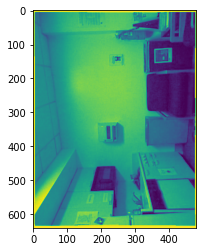

In [23]:
import matplotlib.pyplot as plt
images = mat.get("images")
img = images[0,:,:,:]
plt.imshow(img[0,:,:])

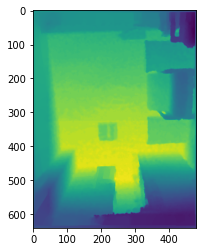

In [14]:


plt.imshow(depths[0])

In [ ]:
plt.imshow(images[0])

In [40]:
import scipy.linalg as la
K = np.array([[10000.0,0,1],[0,1000,1],[0,0,1]])
K

array([[1.e+04, 0.e+00, 1.e+00],
       [0.e+00, 1.e+03, 1.e+00],
       [0.e+00, 0.e+00, 1.e+00]])

In [41]:
dm = depths[0]
Kinv = la.inv(K)
pts = []
for y in range(dm.shape[0]):
    for x in range(dm.shape[1]):
        point = Kinv @ [x,y,1]
        point = dm[y,x] * point
        pts.append(point)

pts = np.array(pts)

In [42]:
import pyvista as pv

cloud = pv.PolyData(pts)
cloud.plot(render_points_as_spheres=True,eye_dome_lighting=True,notebook=False)